# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

### Students

* Team: 37
* Students: Isabela Constantin, Adélie Garin, Celia Hacker, Michael Spieler
* Dataset: Wikipedia

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

# the adjacency matrix we will work with is the adjacency matrix of the largest weakly connected component 
adjacency_disconnected =  np.load('adjacency_undirected.npz')['arr_0'] # the adjacency matrix
adjacency = np.load('largest_wcc.npz')['arr_0'] 
n_nodes =  adjacency.shape[0] # the number of nodes in the network
n_edges =  int(np.sum(adjacency)/2) # the number of edges in the network
print('the network has {} nodes and {} edges'.format(n_nodes, n_edges))

the network has 4589 nodes and 106589 edges


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, proba, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if seed is not None:
        np.random.seed(seed)
        
    adjacency = np.zeros((n,n))
    adjacency[np.triu_indices(n, k=1)] = np.random.choice(2, int(n*(n-1)/2), p=[1-proba, proba])
    adjacency = adjacency + adjacency.T
    return adjacency


Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

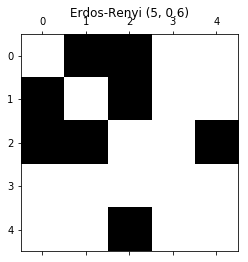

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

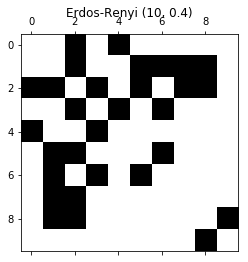

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

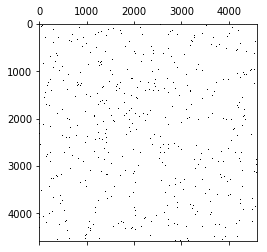

In [6]:
proba= n_edges/(n_nodes*(n_nodes-1)/2)
randomER= erdos_renyi(n_nodes,proba)
plt.spy(randomER)

**Your answer here.**
We chose the same number of nodes as our graph. In order to have a similar number of edges as our graph, we chose the probability to be the number of edges divided by the maximum number of edges possible for a graph on n_nodes

In [7]:
print('The probability chosen is ',round(proba,4))

The probability chosen is  0.0101


### Question 3

Create a function that constructs a Barabási-Albert graph.

In [8]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    assert m <= m0
    
    if seed is not None:
        np.random.seed(seed)
    
    adjacency = np.zeros([n, n], dtype=int)
    degree = np.zeros(n, dtype=int)

    # generate initial connected network with one edge per added node. (m0-1 edges)
    #this is to have a connected graph
    for i in range(1, m0):
        target = np.random.choice(i, 1)
        adjacency[i, target] = adjacency[target, i] = 1
        degree[i] += 1
        degree[target] += 1

    # Grow network
    for i in range(m0, n):
        # Preferential attachment: probability that the new node connects to node i 
        dist = degree[:i] / np.sum(degree[:i])

        # Choose m links without replacement with given probability distribution
        targets = np.random.choice(i, m, replace=False, p=dist)
        adjacency[i,targets] = adjacency[targets, i] = 1
        degree[i] += m
        degree[targets] += 1

    # sanity check
    assert np.array_equal(degree, np.sum(adjacency, axis=0))

    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

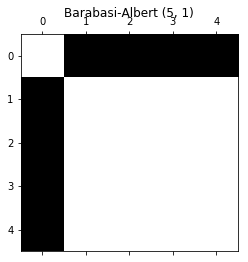

In [9]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

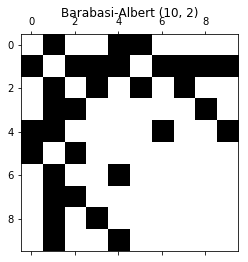

In [10]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5, 1.05, 'Barabasi-Albert (4589, 23, 25)')

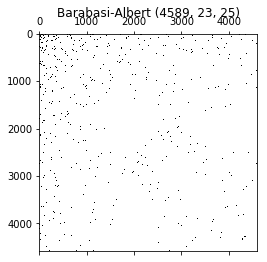

In [11]:
m0 = 25 # this needs to be bigger than m
m = int((n_edges - m0 +1) / (n_nodes - m0)) #to have similar number of edges than in our graph
randomBA = barabasi_albert(n_nodes, m, m0, 8708)
plt.spy(randomBA)
plt.title('Barabasi-Albert ({}, {}, {})'.format(n_nodes, m, m0))

We computed the number of edges that should be added for each node (the value m) so that the total number of edges would be similar to the one of our wikipedia graph, depending on the number of initial nodes (m0) in the BA process. 

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [12]:
m_ER = int(np.sum(randomER)/2)
m_BA = int(np.sum(randomBA)/2)
m_wiki = n_edges

print('The number of edges in the Erdos-Renyi network is ', m_ER)
print('The number of edges in the Barabási-Albert network is ', m_BA)
print('The number of edges in our wiki network is ', m_wiki)

The number of edges in the Erdos-Renyi network is  106655
The number of edges in the Barabási-Albert network is  104996
The number of edges in our wiki network is  106589


The number of edges cannot be controlled precisely, we have fixed number of nodes. However, it is close enough. 

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [13]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    # select the number of degrees that are occuring in the network
    idx_nonzero_p = np.nonzero(p)
    idx_nonzero_q = np.nonzero(q)
    idx_nonzero = np.intersect1d(idx_nonzero_p, idx_nonzero_q)
    
    # now only select those indices
    p = p[idx_nonzero]
    q = q[idx_nonzero]
    # now normalise the values so they sum up to 1 and rebecome probability distributions
    p = p / p.sum()
    q = q / q.sum()
    kl= np.dot(p, np.log(p/q))
    return kl

In [14]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
round(kl_divergence(p_test, q_test),4)

0.0915

In [15]:
# same result as wikipedia examle
p_test = np.array([0.36,0.48,0.16])
q_test = np.array([0.333,0.333,0.333])
round(kl_divergence( q_test, p_test),4)

0.0975

In [16]:
# introduce 0
round(kl_divergence( np.array([0.1, 0, 0.7, 0.2]), np.array([0, 0.6, 0.2, 0.2])),4)

0.1634

In [17]:
# same distrib
round(kl_divergence(np.array([0, 1]), np.array([0,1])),4)

0.0

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [18]:
def plot_distribution(degree, network_type):
    '''
    degree list: the list of node degrees
    network_type: string used for plotting the title
    '''
    fig = plt.figure()
    ax = plt.gca()
    bins = min(int(np.max(degree) - np.min(degree)), 100)
    a = plt.hist(degree, log = True, bins=bins, density=True)
    plt.xlabel('Degree')
    plt.ylabel('Probability of node having degree k')
    plt.title('Degree distribution for '+ network_type)

In [19]:
# this returns a tuple formed out of two arraysL array1 is the degree distribution, array2 is the degree number
def return_hist(degrees, sequence = None):
    '''
    degrees: degree distribution of our graph
    sequence: if not None, it defines the bin edges of the histogram
    '''
    if sequence is None:
        max_degree = max(degrees)
        sequence = np.arange(max_degree+2)
    return np.histogram(degrees, sequence, density=True)

In [20]:
#degree distribution of our network 
degree_wiki=np.sum(adjacency, axis=0)
degree_distribution_wiki= return_hist(degree_wiki)[0]

#compute degree distribution Erdos Renyi Graph
degree_ER=np.sum(randomER, axis =0)
degree_distribution_ER= return_hist(degree_ER)[0]

#degree distribution Barabási-Albert
degree_BA=np.sum(randomBA, axis =0)
degree_distribution_BA= return_hist(degree_BA)[0]


First we compute the kl divergence on the degree distributions without binning them first

In [21]:
print('The kl divergence between the degree distribution of our network and ER is ',round(kl_divergence(degree_distribution_wiki, degree_distribution_ER),3))

The kl divergence between the degree distribution of our network and ER is  1.389


In [22]:
print('The kl divergence between the degree distribution of our network and BA is ', round(kl_divergence(degree_distribution_wiki, degree_distribution_BA),3))

The kl divergence between the degree distribution of our network and BA is  0.233


The degree distribution of BA is closer to our network than ER in terms of KL divergence

#### Because there are many zeroes, we can bin the degree distributions and compare them.


In [23]:
# one binning model would be logarithm, and that would make more sense because the smaller degrees would be binner into smaller bins and larger degrees into larger bins
rightmost_edge = np.max(np.array([max(degree_BA), max(degree_ER),max(degree_wiki) ]))
binning = np.unique(np.ceil(np.geomspace(1, rightmost_edge)))
degree_wiki_log = return_hist(degree_wiki, binning)[0]
degree_BA_log = return_hist(degree_BA, binning)[0]
degree_ER_log = return_hist(degree_ER, binning)[0]

In [24]:
binning

array([1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
       7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.200e+01, 1.300e+01,
       1.600e+01, 1.800e+01, 2.100e+01, 2.400e+01, 2.800e+01, 3.300e+01,
       3.800e+01, 4.400e+01, 5.100e+01, 5.900e+01, 6.900e+01, 8.000e+01,
       9.300e+01, 1.080e+02, 1.250e+02, 1.460e+02, 1.690e+02, 1.970e+02,
       2.290e+02, 2.660e+02, 3.090e+02, 3.590e+02, 4.180e+02, 4.850e+02,
       5.640e+02, 6.560e+02, 7.630e+02, 8.870e+02, 1.032e+03, 1.199e+03,
       1.395e+03, 1.622e+03])

In [25]:
print('The kl divergence between the degree distribution of our network and ER is ', round(kl_divergence(degree_wiki_log, degree_ER_log),3))

The kl divergence between the degree distribution of our network and ER is  2.05


In [26]:
print('The kl divergence between the degree distribution of our network and BA is ', round(kl_divergence(degree_wiki_log, degree_BA_log),3))

The kl divergence between the degree distribution of our network and BA is  0.14


It is even more clear that BA degree distribution is closer that ER distribution to our network.

That is because the KL metric zeros out degrees that have probability 0 in either of the distributions. As we increase the degree, the distribution is more and more sparse, so it is unlikely the similarity of higher degrees is captured.
Applying logarithmic binning diminishes this issue

When considering the build up process of Wikipeda it resembles a lot the Barabasi-Albert graph construction.
You start with an initial set of articles and new articles are added which link to existing articles with a higher probability to link to a popular article (preferential attachment).

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

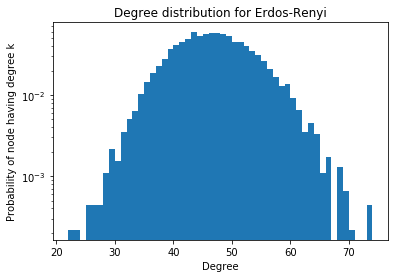

In [27]:
plot_distribution(degree_ER, 'Erdos-Renyi')

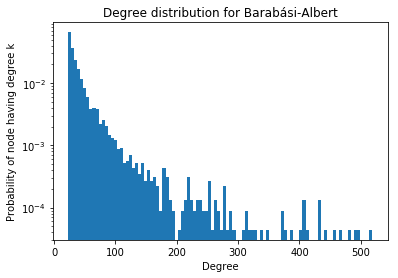

In [28]:
plot_distribution(degree_BA, 'Barabási-Albert')

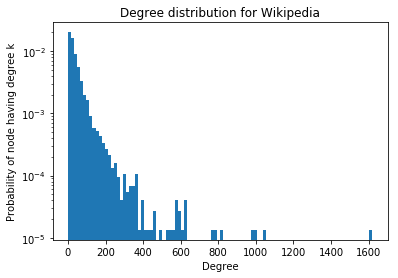

In [29]:
plot_distribution(degree_wiki, 'Wikipedia')

The plots show that the degree distribution of our network is more similar to the degree distribution of Barabasi-Albert, which is coherent with the results indicated by the K-L divergence. 


### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

Not necessarily, we can prove by a counter-example. The following graphs are not isomorphic, but have the same degree distribution 

Text(0.5, 1.05, 'G1')

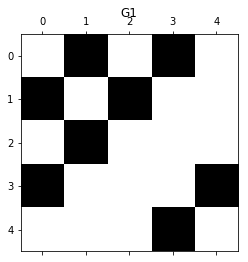

In [30]:
G1 = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0]
])
plt.spy(G1)
plt.title('G1')

Text(0.5, 1.05, 'G2')

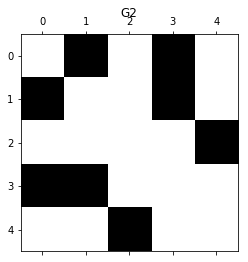

In [31]:
G2 = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0]
])
plt.spy(G2)
plt.title('G2')

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

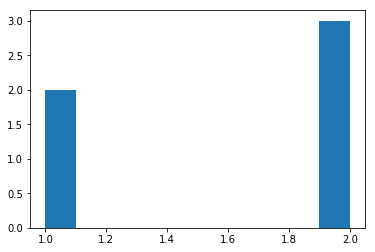

In [32]:
plt.hist(np.sum(G1, axis=0))

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

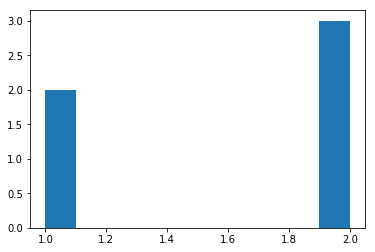

In [33]:
plt.hist(np.sum(G2, axis=0))

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

In [34]:
import networkx as nx
from scipy import sparse

We compared several models stated in the slides with our graph using different properties (number of nodes, edges, clustering coefficient, diameter, degree distribution) and we found that the BA model is the one that fits our graph the best. However, since it is not allowed to use the BA model again, we checked the networkX database for new models and we found one that would fit in theory even better: powerlaw_cluster_graph. 
The BA model was pretty close to our graph (number of nodes and edges, similar diameter, similar type of degree distribution) but the clustering coefficients were very different from ours. This algorithm includes a variable p (see below) that can return higher average clustering coefficient if p is large enough. Hence, we expect the clustering coefficient and the degree distribution to be similar to our graph (or at least better than with BA and ER models). We are also going to test the basic properties stated above.

### Question 11

Explain (in short) how the chosen model works.

The powerlaw_cluster_graph is an improvement of the BA model that takes into account a "Probability of adding a triangle after adding a random edge" which is clearly related to the clustering coefficient (the higher this probability is, the more it increases clustering coefficient in the graph). The variables for the function are the number of nodes n, the number of new edges m to add at each iteration and the probability p stated above. 

It starts with a graph of m nodes and no links. At each iteration, one node and m edges are added. The m edges are attached with preferential attachment (higher degree nodes will tend to have more edges) and with respect to a "clustering step": if possible and according to a probability p, new triangles will be created around the nodes, increasing the clustering coefficient. It stops when the number of nodes in the graph is n. 

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [35]:
# we create a temp graph with networkX to find the average clustering coefficient
G_wiki = nx.from_numpy_array(adjacency)
average_cluster_coeff_wiki = nx.algorithms.average_clustering(G_wiki)
print('The average clustering coeff of our wikipedia network is ', round(average_cluster_coeff_wiki, 3))

The average clustering coeff of our wikipedia network is  0.274


In [36]:
G_clustcoeff=nx.powerlaw_cluster_graph(n_nodes, m,average_cluster_coeff_wiki , seed=42)
assert nx.is_connected(G_clustcoeff)

Text(0.5, 1.05, 'Power law cluster graph with p=average clustering coefficient\n')

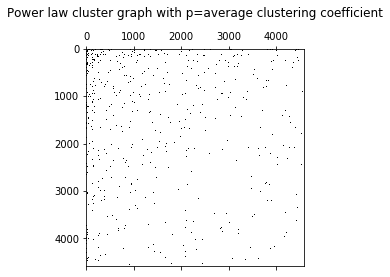

In [37]:
adjG_clustcoeff=nx.to_numpy_array(G_clustcoeff)
plt.spy(adjG_clustcoeff)
plt.title('Power law cluster graph with p=average clustering coefficient\n')

In [38]:
print('The average clustering coeff of the synthetic power_law_cluster_graph network is ', round(nx.algorithms.average_clustering(G_clustcoeff), 3))

The average clustering coeff of the synthetic power_law_cluster_graph network is  0.083


This value is still very low compared to our average clustering coefficient. Hence, we played with the value p and found out that p=1 is the best value to have similar clustering coefficient: we created a second model: 

In [39]:
G_p1=nx.powerlaw_cluster_graph(n_nodes, m, 1 , seed=42)
assert nx.is_connected(G_p1)

Text(0.5, 1.05, 'Power law cluster graph with p=1\n')

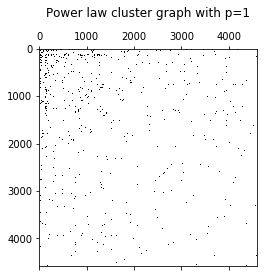

In [40]:
adjG_p1=nx.to_numpy_array(G_p1)
plt.spy(adjG_p1)
plt.title('Power law cluster graph with p=1\n')

In [41]:
nx.algorithms.average_clustering(G_p1)

0.24897871973660876

This is way more similar to the average clustering coefficient that we would like. 

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [42]:
#Compute the number of edges and nodes in G
edgesG_p1=len(G_p1.edges())
print('The number of edges in the random graph is {} and the one in our graph is {}'.format(edgesG_p1,n_edges))

The number of edges in the random graph is 105001 and the one in our graph is 106589


In [43]:
#Compute the average clustering coefficient of the random graph
average_cluster_coeff_G_p1=nx.algorithms.average_clustering(G_p1)

In [44]:
print('The average clustering coefficient of our wikipedia network is {:.5f} and \nthe average clustering coefficient of the random network G is {:.5f}'.format(average_cluster_coeff_wiki,average_cluster_coeff_G_p1))

The average clustering coefficient of our wikipedia network is 0.27447 and 
the average clustering coefficient of the random network G is 0.24898


The average clustering coefficient of the random graph we are considering now with the new model with p=1 is much closer to the average clustering coefficient of the wikipedia network, which is what we were trying to aim (see conclusion at the end).

In [45]:
#compute the degrees in the Graphs
degree_G_p1=np.sum(adjG_p1, axis=0)

In [46]:
print('The average degree in our wikipedia network is {:.2f}'.format(np.mean(degree_wiki)))
print('The average degree in the random network with p = 1 is {:.2f}'.format(np.mean(degree_G_p1)))

The average degree in our wikipedia network is 46.45
The average degree in the random network with p = 1 is 45.76


The two average degree are very similar, as we expected.

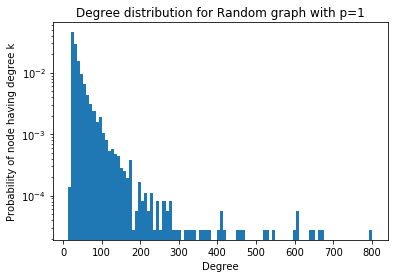

In [47]:
plot_distribution(degree_G_p1, 'Random graph with p=1')

In [48]:
degree_distribution_G_p1 = return_hist(degree_G_p1)[0]

#compare distributions with KL divergence
print(kl_divergence(degree_distribution_wiki,degree_distribution_G_p1))

0.8921390364597461


This value is larger than when comparing with BA model. However, it is still lower than the ER model. 

In [49]:
d_wiki = nx.diameter(G_wiki)

In [50]:
d_G_p1 = nx.diameter(G_p1)

In [51]:
print('The diameter of the wikipedia network is {}'.format(d_wiki))
print('The diameter of the synthetic network is {}'.format(d_G_p1))

The diameter of the wikipedia network is 5
The diameter of the synthetic network is 5


Are the results what you expected? Explain.

**Your answer here.** 

The number of nodes are the same (obviously) and the number of edges are similar (we cannot have exactly the same number of edges but they are close enough). 

The diameters are similar, however it is uncelar how much this is a coincidence due tu random network generation.

We expected the clustering coefficients of the model using p=average clustering coefficient to be higher and closer to the ones of our graph. We were surprised, but when we realized that p=1 was a great value we decided to keep the analysis with this one. A higher value for p increases the clustering coefficient (as it increases the probability of creating triangles). Choosing p=1 was hence a good fit because wikipedia is a really dense graph, in the sense that hubs have very high clustering coefficient. The value p=1 sort of force nodes that have almost triangles formed around them to "finish" the triangles, and hence get really high clustering coefficient. 

Comparing the degree distribution with KL divergence, it looks similar, but not as good as the BA results we got in part 1. 